# Exploratory Data Analysis of Health Burden
In this notebook, you will apply your exploratory data analysis skills to a dataset on health burden. See the `README.md` file for a detailed description of the data source and variables.

## Set up

In [38]:
# Load any packages you want to use (e.g., pandas, matplotlib, and any others)
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
alt.renderers.enable('notebook') # enable notebook rendering

RendererRegistry.enable('notebook')

In [23]:
# Read in the `data/prepped/risk-data.csv` file into a dataframe
# Use the `.head()` method to print out the data frame
data = pd.read_csv('./data/prepped/risk-data.csv')
data.head()

,country,country_code,super_region,region,sex,age,pop,alcohol_use,drug_use,high_meat,low_exercise,smoking
0,China,CHN,"Southeast Asia, East Asia, and Oceania",East Asia,male,70+ years,3.818010e+07,336.913532,40.210751,5.069854,248.266850,1944.480464
1,China,CHN,"Southeast Asia, East Asia, and Oceania",East Asia,female,50-69 years,1.530703e+08,21.000557,4.697916,1.077716,12.919982,37.807709
2,China,CHN,"Southeast Asia, East Asia, and Oceania",East Asia,male,Under 5,4.458679e+07,0.236908,0.120827,NaN,NaN,NaN
3,China,CHN,"Southeast Asia, East Asia, and Oceania",East Asia,male,5-14 years,8.299538e+07,1.292633,0.038498,NaN,NaN,NaN
4,China,CHN,"Southeast Asia, East Asia, and Oceania",East Asia,male,15-49 years,3.901690e+08,35.849941,5.677337,0.188490,3.058205,30.797507


## Data Structure
To get a basic sense of your dataset, check the following:

- What is the size of the dataset (rows, columns)?
- How many countries are present in the dataset?
- What are the age-groups in the dataset?
- What are the variables (columns) present in the dataset?
- What is the data type of each variable?
- What are the summary statistics of each quantitative variable (_hint: `describe()`_)

Note the **count** for each column, and investigate why these may be inconsistent.

In [24]:
# Code goes here to answer the questions listed above
print("Size of the dataset : "+str(data.shape))
countries = set(data.country)

print("Number of Countries : " + str(len(countries)))
age_groups = set(data.age)

print("Age Groups : " + str(age_groups))

print("Variables : " + str(data.columns.values))

print("Variable Datatypes : " + str(data.dtypes.values))

print("Summary : " + str(data.describe()))

# The count for each column might be different bacause for those variables
# some of the inputed values by NaN (Non-existent).

Size of the dataset : (1950, 12)
Number of Countries : 195
Age Groups : {'15-49 years', '70+ years', '5-14 years', 'Under 5', '50-69 years'}
Variables : ['country' 'country_code' 'super_region' 'region' 'sex' 'age' 'pop'
 'alcohol_use' 'drug_use' 'high_meat' 'low_exercise' 'smoking']
Variable Datatypes : [dtype('O') dtype('O') dtype('O') dtype('O') dtype('O') dtype('O')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64')]
Summary :                 pop  alcohol_use     drug_use    high_meat  low_exercise  \
count  1.950000e+03  1950.000000  1950.000000  1170.000000   1170.000000   
mean   3.777708e+06    47.146545     7.128357     2.594225    119.552443   
std    1.913391e+07    86.009150    14.197640     4.043355    153.239610   
min    3.563755e+02  -106.232008     0.000038     0.000176      0.308731   
25%    1.000900e+05     0.273705     0.030068     0.154818      4.033243   
50%    5.054975e+05     6.784878     1.917572     0.8174

## Univariate Analysis
To explore the distribution of each risk-column in a visual way, you'll want to create a histogram of each column (preferrably in the same plot). Luckily, pandas dataframes have a built in `.hist()` method that will do just this! Simply call `df.hist()` to make a histogram for each numeric column. Make sure to adjust the `figsize` parameter to make your charts legible. 

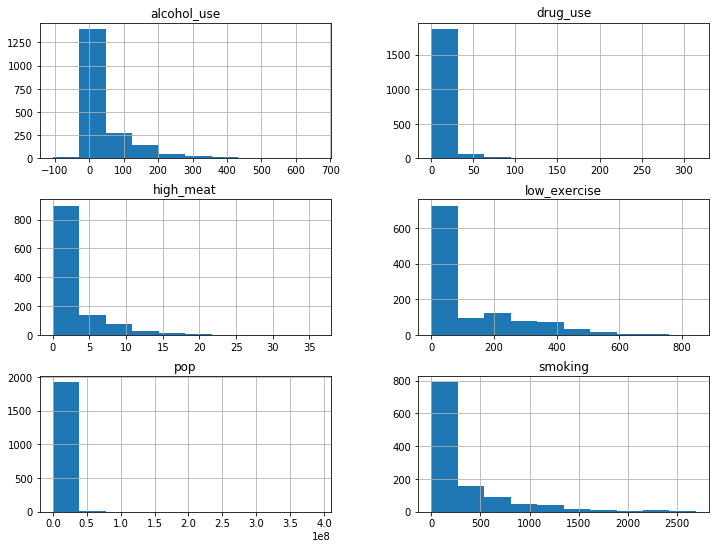

In [43]:
# Code goes here to perform the tasks above

data.hist(figsize=(12,9))
plt.show()

List some observations from your histograms here using Markdown code:

- Observation one : 
- Observation two
- etc...

## Univariate analysis (by age)
In this section, you should **write a function** to investigate how a given risk (column) varies by **age group**. The risk -- column name -- will be the argument to your function. More specifically, the function should create a set of histograms (one for each age-group) to show the distribution of death rates for a given risk factor. For example, it would return a chart with 5 histograms -- one for each age group -- showing the distribution of the `alcohol_use` death rate.

While we haven't discussed it thus far, this type of plot _facetting_ is something easily accomplished using the [Seaborn Package](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html), which you will need to import to use. There's also a great [section](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html#Faceted-histograms) in the _Python Data Science Handbook_ describing this approach.

Make sure to **include a docstring** to describe your function.

In [54]:
# Write the function described above here

def by_age(column):
    c = alt.Chart(data).mark_bar().encode(
        x='age',
        y=column
    )
    return c

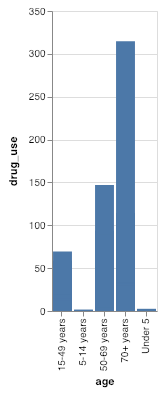

In [55]:
# Demonstrate that your function works by passing a risk of your choice to the function you just wrote.

by_age('drug_use')

List some observations about the relationship by age here using Markdown code:

- Observation one
- Observation two
- etc...

## Univariate analysis (by sex)
In this section, you should investigate how a given risk (column) varies by **sex**. To do this, **write a function** to create a single histogram with _overlapping distributions_ for men and women (for a given risk factor). 

Make sure to include a **docstring**. 

_Hint_: You may need to use the `.dropna()` method to exclude na results from your data before plotting.
_Hint_: turn down the _alpha_ (opacity) to help reduce occlusion in the chart. 

In [56]:
# Write the function described above here

def by_sex(column):
    s = alt.Chart(data).mark_bar().encode(
    x='sex',
    y= column
    )
    return s

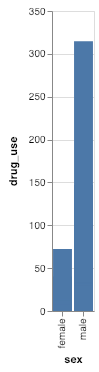

In [57]:
# Demonstrate that your function works by passing a risk of your choice to the function you just wrote.

by_sex('drug_use')

List some observations about the relationship by sex here using Markdown code:

- Observation one
- Observation two
- etc...

## Bivariate analysis
As a final step, create a **scatterplot matrix** of all of your risks to visually assess the correlation across death rates. Hint: see [documentation](https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot).

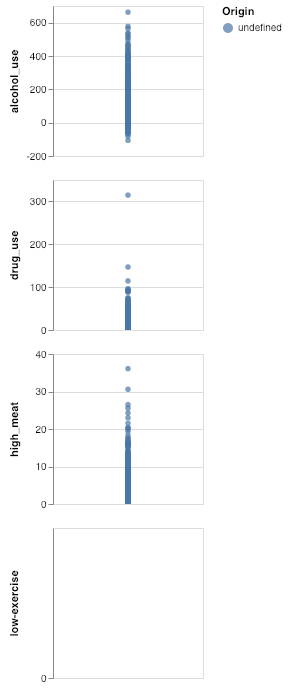

In [53]:
# Write the code here to create the scatterplot matrix

alt.Chart(data).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Origin:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['alcohol_use', 'drug_use', 'high_meat', 'low-exercise'],
    
).interactive()

List some observations from your scatterplot matrix here using Markdown code:

- Observation one
- Observation two
- etc...